In [1]:
import sys
sys.path.append('../../')

In [ ]:
import numpy as np
import json
import os

def euclidean_distance(pt1, pt2):
    return np.linalg.norm(np.predictions[0]ay(pt1) - np.predictions[0]ay(pt2))

def pck(preds, gts, threshold=0.05, img_size=(1280, 720)):
    """Calculate Percentage of Correct Keypoints (PCK)"""
    diag = np.sqrt(img_size[0]**2 + img_size[1]**2)  # Image diagonal as normalization
    threshold *= diag  # Convert ratio to pixel threshold
    correct = [euclidean_distance(p, g) < threshold for p, g in zip(preds, gts)]
    return np.mean(correct)

def mse(preds, gts):
    """Calculate Mean Squared Error (MSE)"""
    return np.mean([(euclidean_distance(p, g) ** 2) for p, g in zip(preds, gts)])

def mae(preds, gts):
    """Calculate Mean Absolute Error (MAE)"""
    return np.mean([euclidean_distance(p, g) for p, g in zip(preds, gts)])

def evaluate_multiple_images(preds_list, gts_list, img_size=(1280, 720)):
    """Evaluate multiple images and compute average metrics"""
    pck_scores = [pck(preds, gts, img_size=img_size) for preds, gts in zip(preds_list, gts_list)]
    mse_scores = [mse(preds, gts) for preds, gts in zip(preds_list, gts_list)]
    mae_scores = [mae(preds, gts) for preds, gts in zip(preds_list, gts_list)]
    
    return {
        "PCK@0.05": np.mean(pck_scores),
        "MSE": np.mean(mse_scores),
        "MAE": np.mean(mae_scores)
    }



In [2]:
from court_line_detector import CourtLineDetector

In [10]:
import cv2

In [7]:
court_model = CourtLineDetector("../../models/keypoints_model.pth")

In [17]:
predictions = []
path = "../../training/Keypoint_eval"
for img_name in os.listdir(path):
    img_path = os.path.join(path,img_name)
    img = cv2.imread(img_path)
    if img is not None:
        pred = court_model.predict(img)  # Predict keypoints
        reshaped_list = [[pred[i], pred[i+1]] for i in range(0, len(pred), 2)]
        id = img_name.split(".")[0]
        object = {
            "id": id,
            "kps": reshaped_list
        }
        predictions.append(object)
    else:
        print(f"Failed to read image: {img_path}")




In [18]:
print(predictions)

[{'id': '-_5ljBK4HnI_500', 'kps': [[np.float32(398.507), np.float32(185.5283)], [np.float32(865.2112), np.float32(185.38576)], [np.float32(204.48952), np.float32(549.171)], [np.float32(1059.9838), np.float32(548.2066)], [np.float32(457.5075), np.float32(185.53813)], [np.float32(311.90402), np.float32(549.0404)], [np.float32(806.63837), np.float32(185.45226)], [np.float32(952.95325), np.float32(548.23456)], [np.float32(437.41095), np.float32(236.60805)], [np.float32(827.00134), np.float32(236.36496)], [np.float32(364.57724), np.float32(419.22125)], [np.float32(900.4628), np.float32(418.54745)], [np.float32(632.04926), np.float32(236.52266)], [np.float32(632.69653), np.float32(418.77463)]]}, {'id': '1dfiSb6WvlA_200', 'kps': [[np.float32(401.8458), np.float32(178.49773)], [np.float32(875.31854), np.float32(178.43987)], [np.float32(174.63321), np.float32(550.84705)], [np.float32(1103.4254), np.float32(550.4609)], [np.float32(461.54205), np.float32(178.53299)], [np.float32(290.99396), np.fl

In [19]:
import numpy as np
import json

def euclidean_distance(pt1, pt2):
    return np.linalg.norm(np.array(pt1) - np.array(pt2))

def pck(preds, gts, threshold=0.05, img_size=(1280, 720)):
    """Calculate Percentage of Correct Keypoints (PCK)"""
    diag = np.sqrt(img_size[0]**2 + img_size[1]**2)
    threshold *= diag
    correct = [euclidean_distance(p, g) < threshold for p, g in zip(preds, gts)]
    return np.mean(correct)

def mse(preds, gts):
    """Calculate Mean Squared Error (MSE)"""
    return np.mean([(euclidean_distance(p, g) ** 2) for p, g in zip(preds, gts)])

def mae(preds, gts):
    """Calculate Mean Absolute Error (MAE)"""
    return np.mean([euclidean_distance(p, g) for p, g in zip(preds, gts)])

# Load ground truth data
gt_filepath = "data_test.json"
with open(gt_filepath, "r") as f:
    ground_truth = json.load(f)

gt_dict = {item["id"]: item["kps"] for item in ground_truth}

# Predictions list
predictions = [{'id': '-_5ljBK4HnI_500', 'kps': [[np.float32(398.507), np.float32(185.5283)], [np.float32(865.2112), np.float32(185.38576)], [np.float32(204.48952), np.float32(549.171)], [np.float32(1059.9838), np.float32(548.2066)], [np.float32(457.5075), np.float32(185.53813)], [np.float32(311.90402), np.float32(549.0404)], [np.float32(806.63837), np.float32(185.45226)], [np.float32(952.95325), np.float32(548.23456)], [np.float32(437.41095), np.float32(236.60805)], [np.float32(827.00134), np.float32(236.36496)], [np.float32(364.57724), np.float32(419.22125)], [np.float32(900.4628), np.float32(418.54745)], [np.float32(632.04926), np.float32(236.52266)], [np.float32(632.69653), np.float32(418.77463)]]}, {'id': '1dfiSb6WvlA_200', 'kps': [[np.float32(401.8458), np.float32(178.49773)], [np.float32(875.31854), np.float32(178.43987)], [np.float32(174.63321), np.float32(550.84705)], [np.float32(1103.4254), np.float32(550.4609)], [np.float32(461.54205), np.float32(178.53299)], [np.float32(290.99396), np.float32(550.7779)], [np.float32(815.92566), np.float32(178.44261)], [np.float32(987.376), np.float32(550.4381)], [np.float32(439.659), np.float32(227.97942)], [np.float32(838.24445), np.float32(227.77635)], [np.float32(355.42258), np.float32(412.17383)], [np.float32(922.8879), np.float32(411.64587)], [np.float32(638.7919), np.float32(227.89297)], [np.float32(639.2121), np.float32(411.73932)]]}, {'id': '1uqPfXR_hv0_400', 'kps': [[np.float32(402.72684), np.float32(160.63715)], [np.float32(866.04834), np.float32(160.56744)], [np.float32(155.02211), np.float32(536.84973)], [np.float32(1116.256), np.float32(537.25616)], [np.float32(460.9327), np.float32(160.58923)], [np.float32(275.13327), np.float32(536.88965)], [np.float32(807.9127), np.float32(160.57034)], [np.float32(996.1332), np.float32(537.2141)], [np.float32(438.36047), np.float32(208.11757)], [np.float32(831.3236), np.float32(208.09593)], [np.float32(347.88052), np.float32(391.9513)], [np.float32(923.11847), np.float32(391.7915)], [np.float32(634.5045), np.float32(208.18156)], [np.float32(635.5234), np.float32(391.62277)]]}, {'id': '7UeoVRvIw5Y_1400', 'kps': [[np.float32(422.5325), np.float32(216.67383)], [np.float32(930.8479), np.float32(216.85829)], [np.float32(212.34668), np.float32(589.52234)], [np.float32(1139.2927), np.float32(590.74097)], [np.float32(486.4994), np.float32(216.63025)], [np.float32(327.95914), np.float32(589.4057)], [np.float32(867.12463), np.float32(216.89804)], [np.float32(1022.9341), np.float32(590.38654)], [np.float32(464.72845), np.float32(269.52148)], [np.float32(888.63556), np.float32(269.9303)], [np.float32(385.0008), np.float32(457.262)], [np.float32(965.7251), np.float32(457.83426)], [np.float32(676.53076), np.float32(269.7876)], [np.float32(674.72217), np.float32(457.63382)]]}, {'id': '9Tpef3_abKU_850', 'kps': [[np.float32(404.9769), np.float32(199.33302)], [np.float32(866.8646), np.float32(199.24236)], [np.float32(221.37434), np.float32(562.26697)], [np.float32(1050.031), np.float32(561.0004)], [np.float32(463.3314), np.float32(199.29517)], [np.float32(325.55145), np.float32(561.9639)], [np.float32(808.86206), np.float32(199.19989)], [np.float32(946.2114), np.float32(561.062)], [np.float32(443.93408), np.float32(251.17082)], [np.float32(828.3322), np.float32(250.94907)], [np.float32(374.38535), np.float32(434.34085)], [np.float32(897.6594), np.float32(433.70538)], [np.float32(635.9397), np.float32(251.0919)], [np.float32(636.01465), np.float32(433.98148)]]}, {'id': '_22eJvtP_lc_150', 'kps': [[np.float32(420.4312), np.float32(164.73207)], [np.float32(853.6973), np.float32(164.68886)], [np.float32(211.08345), np.float32(539.7175)], [np.float32(1065.0045), np.float32(539.9907)], [np.float32(475.1297), np.float32(164.69756)], [np.float32(318.04886), np.float32(539.6515)], [np.float32(799.19415), np.float32(164.655)], [np.float32(957.9407), np.float32(539.9953)], [np.float32(454.9067), np.float32(214.18576)], [np.float32(819.5739), np.float32(214.15125)], [np.float32(377.5668), np.float32(399.7745)], [np.float32(898.36), np.float32(399.71396)], [np.float32(636.98444), np.float32(214.1259)], [np.float32(638.1706), np.float32(399.63892)]]}, {'id': '_7UfL2egoN0_700', 'kps': [[np.float32(396.08295), np.float32(197.1478)], [np.float32(877.9685), np.float32(197.03578)], [np.float32(196.00746), np.float32(561.152)], [np.float32(1078.4979), np.float32(560.0017)], [np.float32(456.89584), np.float32(197.153)], [np.float32(306.75244), np.float32(560.98)], [np.float32(817.5703), np.float32(197.04434)], [np.float32(968.1837), np.float32(560.0496)], [np.float32(436.2982), np.float32(248.46365)], [np.float32(838.5029), np.float32(248.1978)], [np.float32(360.93854), np.float32(431.3088)], [np.float32(913.9371), np.float32(430.57993)], [np.float32(637.258), np.float32(248.37633)], [np.float32(637.4629), np.float32(430.8616)]]}, {'id': '_CT7KRej9AY_2650', 'kps': [[np.float32(410.64352), np.float32(184.48979)], [np.float32(874.4102), np.float32(184.44928)], [np.float32(231.18031), np.float32(569.85767)], [np.float32(1050.4889), np.float32(569.2464)], [np.float32(469.15686), np.float32(184.44289)], [np.float32(334.2397), np.float32(569.6698)], [np.float32(816.238), np.float32(184.43155)], [np.float32(947.3935), np.float32(569.2892)], [np.float32(449.8497), np.float32(239.86581)], [np.float32(835.15234), np.float32(239.80489)], [np.float32(380.92383), np.float32(435.11252)], [np.float32(901.3611), np.float32(434.86353)], [np.float32(642.28314), np.float32(239.89314)], [np.float32(641.2631), np.float32(435.02252)]]}, {'id': '_Itl2z9fUQA_1050', 'kps': [[np.float32(406.57233), np.float32(157.64017)], [np.float32(835.37286), np.float32(157.49391)], [np.float32(183.11996), np.float32(521.9906)], [np.float32(1060.7925), np.float32(521.9575)], [np.float32(460.55743), np.float32(157.51213)], [np.float32(293.04395), np.float32(521.9202)], [np.float32(781.5724), np.float32(157.4651)], [np.float32(950.9618), np.float32(522.0084)], [np.float32(439.84738), np.float32(204.16075)], [np.float32(802.67365), np.float32(204.12762)], [np.float32(358.2478), np.float32(382.78986)], [np.float32(885.9045), np.float32(382.54907)], [np.float32(620.96436), np.float32(204.21867)], [np.float32(622.34985), np.float32(382.5176)]]}, {'id': '_vnC7WQazMM_1300', 'kps': [[np.float32(376.76306), np.float32(208.41638)], [np.float32(899.001), np.float32(208.19)], [np.float32(141.92264), np.float32(572.95374)], [np.float32(1132.6929), np.float32(571.3211)], [np.float32(442.41562), np.float32(208.34364)], [np.float32(265.94067), np.float32(572.7281)], [np.float32(833.6716), np.float32(208.29099)], [np.float32(1009.3589), np.float32(571.3627)], [np.float32(419.37827), np.float32(258.5471)], [np.float32(857.2914), np.float32(258.2368)], [np.float32(331.38367), np.float32(439.96265)], [np.float32(943.66797), np.float32(438.98428)], [np.float32(638.2892), np.float32(258.5002)], [np.float32(637.44946), np.float32(439.35797)]]}]

# Match predictions with ground truth
gt_keypoints_list, pred_keypoints_list = [], []
for pred in predictions:
    img_id = pred["id"]
    if img_id in gt_dict:
        gt_keypoints_list.append(gt_dict[img_id])
        pred_keypoints_list.append(pred["kps"])

# Compute evaluation metrics
pck_scores = [pck(pred, gt) for pred, gt in zip(pred_keypoints_list, gt_keypoints_list)]
mse_scores = [mse(pred, gt) for pred, gt in zip(pred_keypoints_list, gt_keypoints_list)]
mae_scores = [mae(pred, gt) for pred, gt in zip(pred_keypoints_list, gt_keypoints_list)]

results = {
    "PCK@0.05": np.mean(pck_scores),
    "MSE": np.mean(mse_scores),
    "MAE": np.mean(mae_scores)
}

print(results)


{'PCK@0.05': np.float64(0.9523809523809523), 'MSE': np.float64(722.3536046463663), 'MAE': np.float64(13.195659750736967)}


In [26]:
import matplotlib.pyplot as plt
def plot_keypoints(image_folder, predictions, grid_shape=(5, 2)):
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(10, 25), gridspec_kw={'hspace': 0.2})
    axes = axes.ravel()
    
    for i, pred in enumerate(predictions):
        img_id = pred["id"]
        img_path = os.path.join(image_folder, f"{img_id}.png")
        if not os.path.exists(img_path):
            continue
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for x, y in pred["kps"]:
            cv2.circle(image, (int(x), int(y)), 5, (255, 0, 0), -1)
        
        axes[i].imshow(image)
        axes[i].set_title(img_id)
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

C:\Users\Duy Nguyen\AppData\Local\Temp\ipykernel_15396\4002178783.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


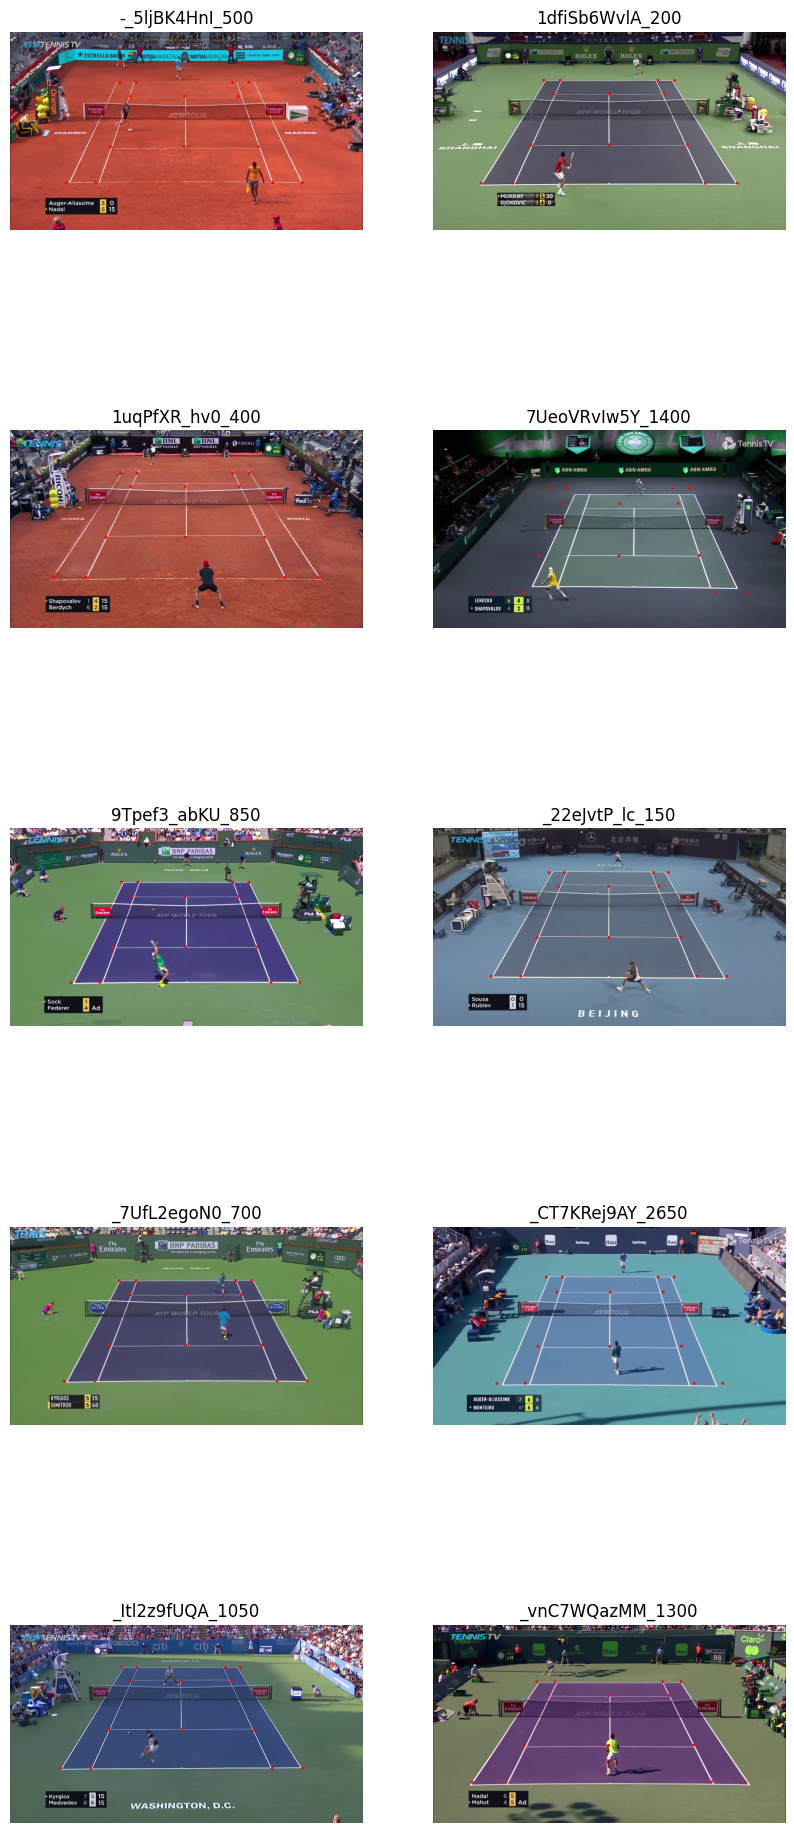

In [27]:
# Display predictions on images
plot_keypoints(path, predictions)
